In [2]:
import pandas as pd
import numpy as np
import json
import folium
from tqdm import tqdm

In [3]:
df_velos = pd.read_csv("data/df_velos_metropoles.csv",index_col=0)
df_velos.date = pd.to_datetime(df_velos.date)

/var/folders/19/pckvwjyn0r7630jpjn3lh1800000gn/T/ipykernel_23968/3483159247.py:1: DtypeWarning: Columns (9,15,19,20,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_velos = pd.read_csv("data/df_velos_metropoles.csv",index_col=0)


In [4]:
df_velos.head()

,date,mois,jour,heure,departement,commune,lat,lon,en agglomeration,type intersection,...,existence securite,usage securite,obstacle fixe heurte,obstacle mobile heurte,localisation choc,manoeuvre avant accident,identifiant vehicule,type autres vehicules,manoeuvre autres vehicules,nombre autres vehicules
200500000030,2005-01-13,1,3 - jeudi,19.0,62,62331,50.300,2.840,oui,Hors intersection,...,NaN,NaN,NaN,Véhicule,Côté gauche,Changeant de file à gauche,200500000030B02,Transport en commun,Dépassant à gauche,1.0
200500000034,2005-01-19,1,2 - mercredi,10.0,62,62022,0.000,0.000,non,Hors intersection,...,NaN,NaN,NaN,Véhicule,Avant,Sans changement de direction,200500000034B02,"VU seul 1,5T <= PTAC <= 3,5T avec ou sans remo...",Tournant à gauche,1.0
200500000078,2005-01-26,1,2 - mercredi,13.0,02,02173,0.000,0.000,non,Autre intersection,...,Casque,Non,NaN,Véhicule,Avant,Sans changement de direction,200500000078B02,VL seul,Tournant à gauche,1.0
200500000093,2005-01-03,1,0 - lundi,13.0,02,02810,49.255,3.094,oui,Hors intersection,...,NaN,NaN,NaN,Véhicule,Avant gauche,Manœuvre d’évitement,200500000093B02,VL seul,Manœuvre d’évitement,1.0
200500000170,2005-01-29,1,5 - samedi,18.0,76,76196,0.000,0.000,non,Hors intersection,...,Autre,Oui,NaN,Véhicule,Arrière,"Même sens, même file",200500000170A01,"VU seul 1,5T <= PTAC <= 3,5T avec ou sans remo...","Même sens, même file",1.0


<AxesSubplot: xlabel='Année'>

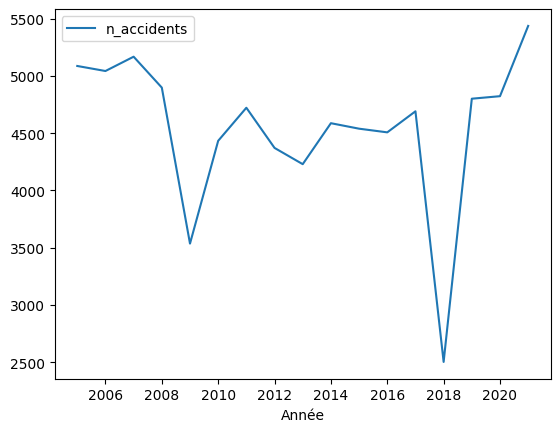

In [7]:
df_velos_by_year = df_velos.groupby(df_velos.date.dt.year).agg({"jour": "count"}).reset_index()
df_velos_by_year.columns = ["Année", "n_accidents"]
df_velos_by_year.plot.line(x="Année", y="n_accidents")

<AxesSubplot: xlabel='Jour'>

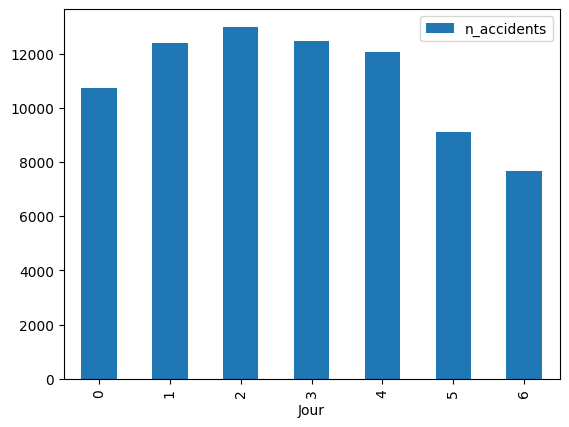

In [8]:
df_velos_by_year = df_velos.groupby(df_velos.date.dt.weekday).agg({"jour": "count"}).reset_index()
df_velos_by_year.columns = ["Jour", "n_accidents"]
df_velos_by_year.plot.bar(x="Jour", y="n_accidents")

<AxesSubplot: xlabel='Date'>

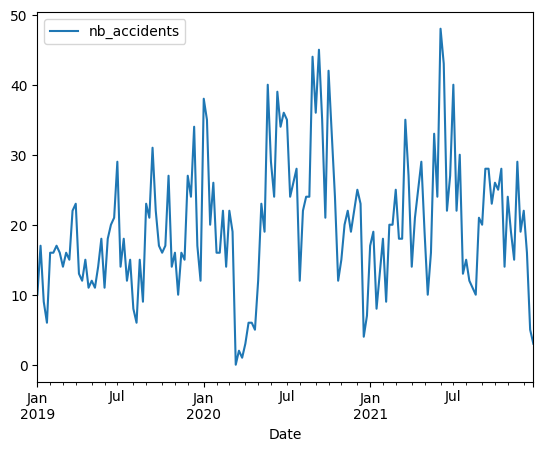

In [67]:
PARIS_ONLY = True
df = df_velos.copy()
if PARIS_ONLY:
    df = df[df.departement == '75']

df["nb_accidents"] = 1
df['Date'] = pd.to_datetime(df['date']) - pd.to_timedelta(7, unit='d')
df = (df.groupby([pd.Grouper(key='Date', freq='W-MON')])["nb_accidents"]
    .sum()
    .reset_index()
    .sort_values('Date')
     )
df[df.Date.dt.year > 2018].plot.line(x="Date", y="nb_accidents")

In [70]:
df.max()

Date            2021-12-27 00:00:00
nb_accidents                     48
dtype: object